# Analyze A/B Test Results  by *Samiha Amroune*


This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusion](#conclusion)
- [Sources](#sources)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:


**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
#read the data
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
# number of rows
df.shape[0]

294478

**c.** The number of unique users in the dataset.

In [4]:
#number of unique users
df['user_id'].nunique()

290584

**d.** The proportion of users converted.

In [5]:
# The proportion of users converted
df['converted'].mean()

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
#The number of times when the "group" is treatment but "landing_page" is not a new_page.
db = df.query('group == "treatment" & landing_page!="new_page"')
db.shape[0]

1965

In [7]:
#The number of times when the "group" is not treatment but "landing_page" a new_page.
dd = df.query('group != "treatment" & landing_page=="new_page"')

#calculate the number of times the new_page and treatment don't match
no_match = dd.shape[0]+db.shape[0]
no_match

3893

**f.** Do any of the rows have missing values?

In [8]:
# check of missing values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
#make a copy of df
df2 = df[
    ((df.group=='treatment') & (df.landing_page=='new_page')) | ((df.group=='control') & (df.landing_page=='old_page'))
]

In [10]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [11]:
#check of unique users in df2
df2['user_id'].nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [12]:
#check of duplicate user_id in df2
df2['user_id'].duplicated().sum()

1

**c.** Display the rows for the duplicate **user_id**? 

In [13]:
# Display the rows for the duplicate user_id
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [14]:
# Remove one of the rows with a duplicate user_id..
index_duplicate = df2[
    ((df2.user_id == 773192)
     &( df2.timestamp == '2017-01-14 02:55:59.590927')
     & (df2.group == 'treatment')
     & (df2.converted == 0))
].index
df2 = df2.drop(index_duplicate)
# Check again if the row with a duplicate user_id is deleted or not
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted


In [15]:
#check again for duplicates
df2['user_id'].duplicated().sum()

0

### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?



In [16]:
# calculate probability converted
p_population = df2['converted'].mean()
p_population

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
#calculate the probability they converted in control group
p_control_converted = df2.query('group == "control"').converted.mean()

# print the probability they converted
print(p_control_converted)

# using round to see the percentage of the probability they converted
print(round(p_control_converted * 100),'%')

0.1203863045004612
12 %


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
#calculate the probability they converted in treatment group
p_treatment_converted = df2.query('group == "treatment"').converted.mean()

# print the probability they converted
print(p_treatment_converted)

# using round to see the percentage of the probability they converted
print(round(p_treatment_converted * 100),'%')

0.11880806551510564
12 %


In [19]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = p_treatment_converted - p_control_converted 
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [20]:
# probability that an individual received the new page
p_newp = df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]
print(p_newp)
print(round(p_newp * 100),'%')

0.5000619442226688
50 %


**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

# Answer:
>After calculating the probabilities for each

>- treatment group which amounted to **0.118807247902774058**
>- And the control group which reached **0.1203863045004612**

>Although the **"converted"** probability (or rate) for the old page is *slightly* higher than that of the new page by **0.0015**, we note that the conversion ratio for both groups after rounding the result is **12%**, we cannot say that the new page leads to more conversions, we need to take into account other factors


<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

# Answer:

> **$ H_0$** :  **$p_{new}$**  - **$p_{old}$**  <= 0
 
> **$H_1$** : **$p_{new}$** - **$p_{old}$** > 0

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [21]:
# The conversion rate  𝑝𝑛𝑒𝑤  under the null hypothesis
p_new = df2['converted'].mean()
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [22]:
# The conversion rate 𝑝𝑜𝑙𝑑 under the null hypothesis
p_old = df2['converted'].mean()
p_old

0.11959708724499628

In [23]:
# number of individuals who received new_page
n_new = df2[df2.landing_page == 'new_page'].shape[0]
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [24]:
# number of individuals who received old_page
n_old = df2[df2.landing_page == 'old_page'].shape[0]
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>

In [25]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0, 1], size=n_new, p=[(1 - p_new), p_new])
new_page_converted.mean()

0.11719771522950932

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [26]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([0, 1], size=n_old, p=[(1 - p_old), p_old])
old_page_converted.mean()

0.11899582857221526

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [27]:
diff_conv_mean = new_page_converted.mean() - old_page_converted.mean()
diff_conv_mean

-0.001798113342705937


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [28]:
# Sampling distribution 
p_diffs = []
for _ in range(10000):
    new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
    old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
    p_diffs = new_converted_simulation - old_converted_simulation

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

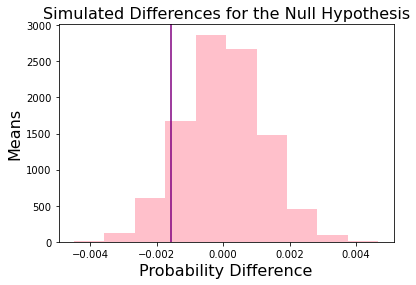

In [29]:
# plot p_diffs
p_diffs = np.array(p_diffs)
plt.hist(p_diffs, color='pink')
plt.title("Simulated Differences for the Null Hypothesis", fontsize=16)
plt.xlabel("Probability Difference", fontsize=16)
plt.ylabel("Means", fontsize=16)
plt.axvline(obs_diff, color='purple');

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [30]:
# calculate the p)value
(p_diffs > obs_diff).mean()

0.9041

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

# Answer:
>The value computed in part **j** is the **p_value** which is a measure of the probability of a noticeable difference occurring by random chance.
The lower the **p_value**, the greater the statistical significance of the observed difference.
The **p_value** can be used as a proxy or in addition to predefined confidence levels for hypothesis testing.

>In our case, it is the probability of observing the difference between the conversion rates between the control and treatment groups
If the null hypothesis is true, we will not notice the difference. 
**In order to reject the null hypothesis** the **p_value** must be less than our **α** level of **0.05** or **5%** but we found it **0.9** which is too high to allow us to reject the null hypothesis



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [31]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query('landing_page == "old_page" & converted==1')['converted'].shape[0]

# number of conversions with the new_page
convert_new = df2.query('landing_page == "new_page" & converted==1')['converted'].shape[0]

# show results
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

In [32]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest(
    [convert_new, convert_old], [n_new, n_old], alternative='larger'
)
# print z_score and p_value
print(z_score, p_value)

-1.3109241984234394 0.9050583127590245


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

# Answer:
>**Z-score** is measured in terms of standard deviations from the mean
in our case a negative **Z-score**: **-1.31092419842** indicating it is below the mean.
and we getting a similar p-value to one computed in Hypothesis testing i.e **90%**

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

# Answer:
 >We should use **Logistic regression** since our dependent variable is binary.

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [33]:
#  Fit the regression model
# set intercept to 1
df2['intercept'] = 1
# dummy variable
df2[['ab_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [34]:
# fit the model
lm = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
# Provide the summary 
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2022-02-07 21:39 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?

# Answer
>The probability value calculated here is **0.189**. This is because the logit regression is based on a two-tailed test. Also, the value is still greater than our alpha value of **0.190 > 0.05**, so we are still on the same path and we cannot reject our null hypothesis.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

# Answer:
>According to the data provided to us, we only look at the conversion rate at the present time from the old page to the new one, but in fact there may be other factors related to the conversion rate, such as the personality of users who may not like changes or confuse them with some changes on the new page, adding New terminology is needed to improve the model as long as we do not have highly correlated or overlapping predictions

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

 Provide the statistical output as well as a written response to answer this question.

In [36]:
# Read the countries.csv
dc = pd.read_csv('countries.csv')
dc.head(3)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK


In [37]:
# Join with the df2 dataframe
df_merged = dc.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_merged.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0


In [38]:
# Check countries in the merged dataset
df_merged.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [39]:
# Create the necessary dummy variables
df_merged[['ca', 'uk', 'us']] = pd.get_dummies(df_merged['country'])
df_merged.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page,ca,uk,us
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0


In [40]:
#fit the model
lm = sm.Logit(df_merged['converted'], df_merged[['intercept', 'uk', 'us']])
result = lm.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.8333
Date:               2022-02-07 21:39 BIC:              212812.5723
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           2                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.19835    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
uk             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
us             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

In [41]:
# Create additional columns specifying what user/country converted
df_merged['us_page'] = df_merged['us'] * df_merged['ab_page']
df_merged['uk_page'] = df_merged['uk'] * df_merged['ab_page']
df_merged.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page,ca,uk,us,us_page,uk_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0,0,1


In [42]:
# Fit your model, and summarize the results
lm = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'us', 'uk', 'us_page', 'uk_page']])
result = lm.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2022-02-07 21:39 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
us             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
uk             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
us_page        0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
uk_page        0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

# Answer:
>Looking at p-values for all variables are **>0.05** we can say that interactions between page and country have no significant effects on conversion.


In [43]:
#calculate timestamp to check the period of testing
start_time = df2.timestamp.min() 
end_time = df2.timestamp.max()
print("start_time:" ,start_time)
print("end_time:" ,end_time)

start_time: 2017-01-02 13:42:05.378582
end_time: 2017-01-24 13:41:54.460509


<a id='conclusion'></a>
# conclusion:
> After analyzing all the data provided it did not prove to be better than the **old page** and we have no evidence of switching to the **new page**, so we recommend against changing. <br>
Although there may be other factors that might change our results, such as giving the model more time to experiment (According to our data, the experiment was only for **9 days**) or adding other resources, we failed to find a model that is good at predicting conversions based on the data we have.

>**As a conclusion we fail to reject the null hypothesis**

<a id='sources'></a>
# Sources:
- [Display duplicates](https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/)
- [Drop A specific row In Pandas](https://stackoverflow.com/questions/43136137/drop-a-specific-row-in-pandas)
- [join-issue-columns-overlap-but-no-suffix-specified](https://stackoverflow.com/questions/26645515/pandas-join-issue-columns-overlap-but-no-suffix-specified)

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

Traceback (most recent call last):
  File "/Users/odaislate/opt/anaconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/odaislate/opt/anaconda3/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/odaislate/opt/anaconda3/lib/python3.8/site-packages/nbconvert/__main__.py", line 2, in <module>
    main()
  File "/Users/odaislate/opt/anaconda3/lib/python3.8/site-packages/jupyter_core/application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/Users/odaislate/opt/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/Users/odaislate/opt/anaconda3/lib/python3.8/site-packages/nbconvert/nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "/Users/odaislate/opt/anaconda3/lib/python3.8/site-packages/nbconvert/nbconvertapp.py", line

1